In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

In [4]:
path = 'train_2015_12_2016_1.txt'
data = pd.read_csv(path,delimiter=',',header=None,names=['flavor','time_index','count'])
data.head()

,flavor,time_index,count
0,1,0,3
1,1,1,6
2,1,2,2
3,1,3,2
4,1,4,0


In [19]:
f1_train = data[data['flavor'] == 1][['time_index','count']]
f1_train.head()

,time_index,count
0,0,3
1,1,6
2,2,2
3,3,2
4,4,0


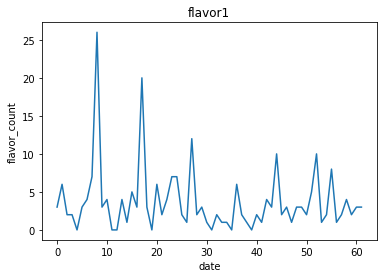

In [25]:
fig, ax = plt.subplots(1)
ax.plot(f1_train['time_index'],f1_train['count'])
ax.set_xlabel('date')
ax.set_ylabel('flavor_count')
ax.set_title('flavor1')

In [198]:
# 对数据去噪
q1 = f1_train['count'].quantile(0.25)
q3 = f1_train['count'].quantile(0.75)
upper_limit = q3 + 3 * (q3 - q1)
c_mean = f1_train['count'].mean()
upper_limit
q3+1.5*(q3-q1)

8.5

In [199]:
len(f1_train['count'])

62

In [200]:
a = []
for i in range(len(f1_train['count'])):
    if f1_train['count'][i] < upper_limit:
        a.append(f1_train['count'][i])
a.sort()

In [203]:
# 非噪点最大两个值得平均
f1_train_remove = f1_train['count']
for i in range(len(f1_train_remove)):
    if f1_train_remove[i] >= upper_limit:
        #f1_train_remove[i] = (a[-1]+a[-2])/2.0
        f1_train_remove[i] = (f1_train_remove[i-1]+f1_train_remove[i+1])/2.0


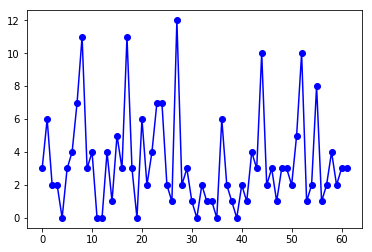

In [204]:
plt.figure()
plt.plot(np.arange(len(f1_train_remove)), f1_train_remove,'bo-')
plt.show()

In [103]:
def change(x):
    if x > upper_limit:
        return q3+1.5*(q3-q1)
    return x

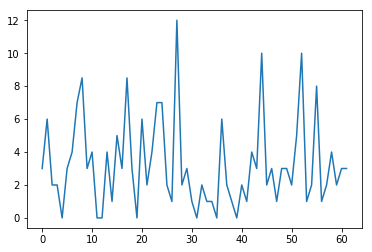

In [106]:
f1_remove_out = f1_train['count'].map(change)
fig, ax = plt.subplots(1)
ax.plot(f1_remove_out)

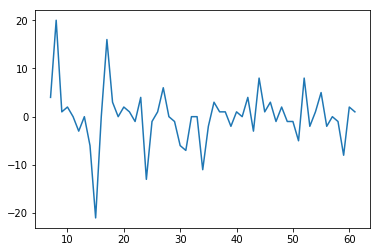

In [107]:
f1_train_diff = f1_train['count'].diff(7)
fig, ax = plt.subplots(1)
ax.plot(f1_train_diff)

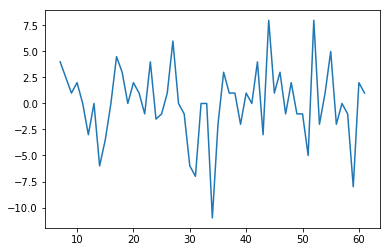

In [110]:
f1_train_diff = f1_remove_out.diff(7)
fig, ax = plt.subplots(1)
ax.plot(f1_train_diff)

In [111]:
all_data_count = data.groupby(['time_index'])['count'].sum().reset_index()
all_data_count


,time_index,count
0,0,21
1,1,32
2,2,18
3,3,7
4,4,1
5,5,31
6,6,36
7,7,79
8,8,48
9,9,46


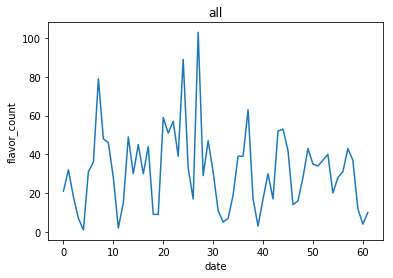

In [12]:
fig, ax = plt.subplots(1)
ax.plot(all_data_count['time_index'],all_data_count['count'])
ax.set_xlabel('date')
ax.set_ylabel('flavor_count')
ax.set_title('all')

In [159]:
f1_train_diff_new = f1_train_diff
dataframe = pd.DataFrame()

for i in range(7,0,-1):

    dataframe['t-'+str(i)] = f1_train_diff_new.shift(i)

dataframe['t'] = f1_train_diff_new.values

print(dataframe.head(20))


    t-7  t-6  t-5  t-4  t-3  t-2  t-1    t
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7   NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0
8   NaN  NaN  NaN  NaN  NaN  NaN  4.0  2.5
9   NaN  NaN  NaN  NaN  NaN  4.0  2.5  1.0
10  NaN  NaN  NaN  NaN  4.0  2.5  1.0  2.0
11  NaN  NaN  NaN  4.0  2.5  1.0  2.0  0.0
12  NaN  NaN  4.0  2.5  1.0  2.0  0.0 -3.0
13  NaN  4.0  2.5  1.0  2.0  0.0 -3.0  0.0
14  4.0  2.5  1.0  2.0  0.0 -3.0  0.0 -6.0
15  2.5  1.0  2.0  0.0 -3.0  0.0 -6.0 -3.5
16  1.0  2.0  0.0 -3.0  0.0 -6.0 -3.5  0.0
17  2.0  0.0 -3.0  0.0 -6.0 -3.5  0.0  4.5
18  0.0 -3.0  0.0 -6.0 -3.5  0.0  4.5  3.0
19 -3.0  0.0 -6.0 -3.5  0.0  4.5  3.0  0.0


In [160]:
dataframe['y'] = f1_train['count']
dataframe = dataframe[14:]
dataframe

,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t,y
14,4.0,2.5,1.0,2.0,0.0,-3.0,0.0,-6.0,1
15,2.5,1.0,2.0,0.0,-3.0,0.0,-6.0,-3.5,5
16,1.0,2.0,0.0,-3.0,0.0,-6.0,-3.5,0.0,3
17,2.0,0.0,-3.0,0.0,-6.0,-3.5,0.0,4.5,20
18,0.0,-3.0,0.0,-6.0,-3.5,0.0,4.5,3.0,3
19,-3.0,0.0,-6.0,-3.5,0.0,4.5,3.0,0.0,0
20,0.0,-6.0,-3.5,0.0,4.5,3.0,0.0,2.0,6
21,-6.0,-3.5,0.0,4.5,3.0,0.0,2.0,1.0,2
22,-3.5,0.0,4.5,3.0,0.0,2.0,1.0,-1.0,4
23,0.0,4.5,3.0,0.0,2.0,1.0,-1.0,4.0,7


In [149]:
x_train =  dataframe[:-14][['t-7','t-6','t-5','t-4','t-3','t-2','t-1']]
y_train = dataframe[:-14]['y']
x_test = dataframe[-14:][['t-7','t-6','t-5','t-4','t-3','t-2','t-1']]
y_test = dataframe[-14:]['y']

In [150]:
from sklearn.tree import DecisionTreeRegressor

In [151]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)
result = clf.predict(x_test)
result

array([ 20.,   4.,   1.,   1.,  12.,   3.,   3.,   1.,   6.,   3.,  10.,
         2.,   3.,  10.])

In [152]:
clf.score(x_test,y_test)

-4.4400000000000004

In [153]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
result = linear_reg.predict(x_test)
linear_reg.score(x_test,y_test)

-1.593255864267888

In [154]:
result

array([ 7.05003285,  2.30718474,  4.80728787,  3.98395739,  5.00337982,
        4.66086978,  4.18799905,  0.23339552,  8.12137494, -0.3191796 ,
        2.83716442,  7.31153634,  0.85951703,  5.72018533])

In [155]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(x_train,y_train)
result = model.predict(x_test)
model.score(x_test,y_test)

-0.44299231999999983

In [156]:
result

array([ 7.566,  2.64 ,  4.588,  3.034,  6.646,  4.116,  4.63 ,  2.81 ,
        4.674,  2.892,  6.046,  3.412,  2.642,  7.394])

In [157]:
result.round()

array([ 8.,  3.,  5.,  3.,  7.,  4.,  5.,  3.,  5.,  3.,  6.,  3.,  3.,  7.])

In [158]:
y_test.values

array([ 3,  3,  2,  5, 10,  1,  2,  8,  1,  2,  4,  2,  3,  3], dtype=int64)

In [140]:
# 测试使用不做差分的数据
f1_train_diff_new = f1_remove_out
dataframe = pd.DataFrame()

for i in range(7,0,-1):

    dataframe['t-'+str(i)] = f1_train_diff_new.shift(i)

dataframe['t'] = f1_train_diff_new.values

dataframe = dataframe[14:]

x_train =  dataframe[:-14][['t-7','t-6','t-5','t-4','t-3','t-2','t-1']]
y_train = dataframe[:-14]['t']
x_test = dataframe[-14:][['t-7','t-6','t-5','t-4','t-3','t-2','t-1']]
y_test = dataframe[-14:]['t']
x_train

,t-7,t-6,t-5,t-4,t-3,t-2,t-1
14,7.0,8.5,3.0,4.0,0.0,0.0,4.0
15,8.5,3.0,4.0,0.0,0.0,4.0,1.0
16,3.0,4.0,0.0,0.0,4.0,1.0,5.0
17,4.0,0.0,0.0,4.0,1.0,5.0,3.0
18,0.0,0.0,4.0,1.0,5.0,3.0,8.5
19,0.0,4.0,1.0,5.0,3.0,8.5,3.0
20,4.0,1.0,5.0,3.0,8.5,3.0,0.0
21,1.0,5.0,3.0,8.5,3.0,0.0,6.0
22,5.0,3.0,8.5,3.0,0.0,6.0,2.0
23,3.0,8.5,3.0,0.0,6.0,2.0,4.0


In [167]:
x_test

,t-7,t-6,t-5,t-4,t-3,t-2,t-1
48,0.0,4.0,-3.0,8.0,1.0,3.0,-1.0
49,4.0,-3.0,8.0,1.0,3.0,-1.0,2.0
50,-3.0,8.0,1.0,3.0,-1.0,2.0,-1.0
51,8.0,1.0,3.0,-1.0,2.0,-1.0,-1.0
52,1.0,3.0,-1.0,2.0,-1.0,-1.0,-5.0
53,3.0,-1.0,2.0,-1.0,-1.0,-5.0,8.0
54,-1.0,2.0,-1.0,-1.0,-5.0,8.0,-2.0
55,2.0,-1.0,-1.0,-5.0,8.0,-2.0,1.0
56,-1.0,-1.0,-5.0,8.0,-2.0,1.0,5.0
57,-1.0,-5.0,8.0,-2.0,1.0,5.0,-2.0


In [179]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(x_train,y_train)
result = model.predict(x_test)
model.score(x_test,y_test)

-0.39003885714285719

In [168]:
result

array([ 7.37,  3.08,  4.67,  3.27,  6.64,  4.51,  4.52,  2.71,  4.63,
        3.3 ,  5.7 ,  3.53,  2.73,  6.78])

In [178]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)
result = linear_reg.predict(x_test)
linear_reg.score(x_test,y_test)

-1.593255864267888

In [146]:
result.round()

array([ 3.,  2.,  2.,  5.,  3.,  3.,  3.,  3.,  3.,  2.,  3.,  5.,  2.,  2.])

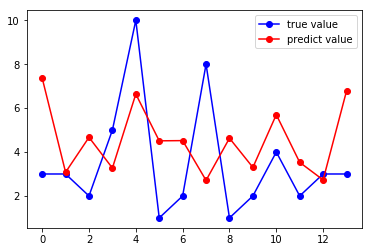

In [180]:
plt.figure()
plt.plot(np.arange(len(result)), y_test,'bo-',label='true value')
plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
plt.legend()
plt.show()

In [173]:
clf = DecisionTreeRegressor()
clf.fit(x_train,y_train)
result = clf.predict(x_test)
clf.score(x_test,y_test)

-4.4742857142857142